Suppose that we would to visualize **how the 2024 US presidential race has evolved over time**. Which chart should we use?

# Line Graphs

The `plot()` function in the `matplotlib.pyplot` library is very powerful and can create different plotting options and formats. 

We will first use the `plot()` function to create a line graph and then we learn how to create scatterplots. 


Please keep in mind that many of the ideas that we discuss here (e.g., adding legends, arguments, fmt option, legends, subplots, etc.) for line graphs can be applied to other charts that can be created using `plot()`.

The following link contains the reference to many ideas discussed in this document. Please review the link as you learn the material discussed in this document and try to customize your plot as you learn new techniques matplotlib.pyplot.plot documentation.

Creating a line graph requires two different variables, usually both being numerical 

* The variable on the y-axis is the one we want to monitor when the other variable changes
* The one on the x-axis could also be time, creating a time series


For example, let $x$ be the price of a product and $y$ be the corresponding sales. **How does sales change in price**? 

| x (price) | y (sales) |
|-----------|-----------|
|   5    |  30       |
|   6.5    |  27       |
|   7    |  19       | 

To plot, one needs to import the `matplotlib.pyplot` package first.

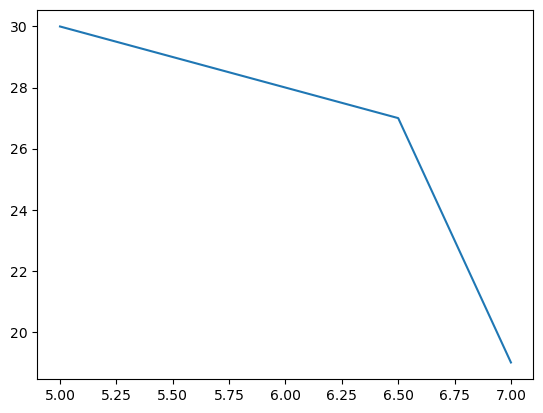

In [2]:
import matplotlib.pyplot as plt

plt.plot([5,6.5,7],[30,27,19])
plt.show()

In the following, we will visualize the winning probabilties of the 2024 US election.

Let us load the csv file **US_Election_2024.csv**.

In [4]:
import pandas as pd

election = pd.read_csv("https://raw.githubusercontent.com/zhouy185/BUS_O712/refs/heads/main/Data/US_Election_2024.csv")

In [5]:
# Examine the data
election.head()

,model_date,DEM_win,REP_win
0,2024-10-04,0.5424,0.4539
1,2024-10-03,0.5602,0.4364
2,2024-10-02,0.5769,0.4194
3,2024-10-01,0.5496,0.4466
4,2024-09-30,0.5681,0.4278


The 'model_date' column's data type is `str`. So let us convert it to time.

The function `pd.to_datetime()` fulfils this purpose. 

In [7]:
election['model_date'] = pd.to_datetime(election['model_date'])

In [8]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   model_date  71 non-null     datetime64[ns]
 1   DEM_win     71 non-null     float64       
 2   REP_win     71 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


We may sort the rows according to the date, using `df.sort_values()`. By default, it will sort according to the ascending order.

In [10]:
election.sort_values(by='model_date',ascending=True,inplace=True)

In [11]:
election.head()

,model_date,DEM_win,REP_win
70,2024-07-26,0.4676,0.5281
69,2024-07-27,0.4643,0.5323
68,2024-07-28,0.4657,0.5304
67,2024-07-29,0.4589,0.5375
66,2024-07-30,0.4851,0.5113


Now we can plot the `DEM_win` column against the `model_date` column

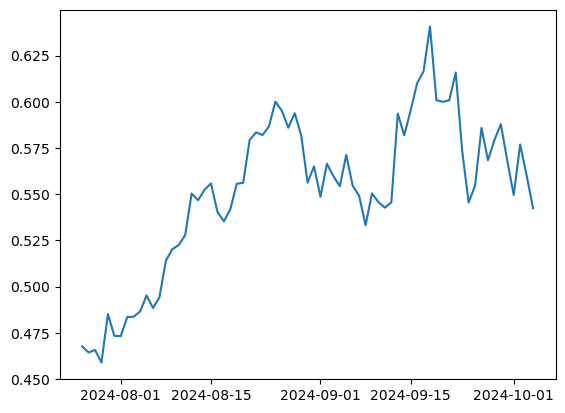

In [13]:
plt.plot(election['model_date'],election['DEM_win'])
plt.show()

Next, we will add a few arguments and apply functions in `plt` to customize the plot. 

## Using kwargs to change the look of the chart

The kwargs (short for keyword arguments) customizes different aspects of a plot. 

They are passed into the `plot()` function as arguments (e.g., linewidth, markersize, etc.). You can find these under `**kwargs` in the documentation for the `plot()` function can be found in the `matplotlib.pyplot.plot` documentation.

We will: 
* Change the color using `color=`, line style using 'linestyle='
* Add markers for all data points and specify style, size, and color of the markers by:
    * `marker=`, `markersize=`,`markerfacecolor=`
* Use `plt.title()` to define the title
* Use `plt.xlabel()` and `plt.ylabel()` for the axis labels  
* Use `plt.grid()` to add grids
* Use `plt.xticks(list_of_ticks, rotation=num_of_degrees)` to specify the ticks on the x-axis, and to rotate the labels (to avoid label overlapping)
* Use `plt.yticks()` similarly

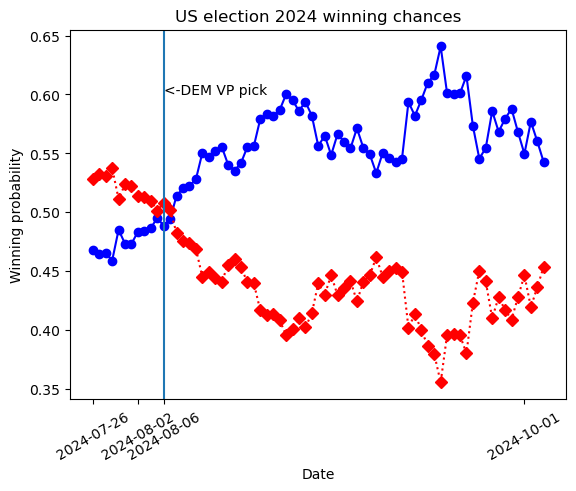

In [31]:
plt.plot(election['model_date'],election['DEM_win'],'o-b')
plt.plot(election['model_date'],election['REP_win'],'D:r')
plt.title('US election 2024 winning chances')
plt.xlabel('Date')
plt.xticks(['2024-07-26','2024-08-02','2024-08-06','2024-10-01'],rotation=30)
plt.ylabel('Winning probability')

plt.axvline(x=pd.to_datetime('2024-08-06'))
plt.text(pd.to_datetime('2024-08-06'),0.6,'<-DEM VP pick')
plt.show()

## The fmt parameter

The `fmt` argument helps us effortlessly set colour, marker and linestyle.
* The format is `'[marker][line][color]'`, see the tables below

Each of them is optional. If not provided, the value from the style cycle is used. Exception: If line is given, but no marker, the data will be a blue line without markers.

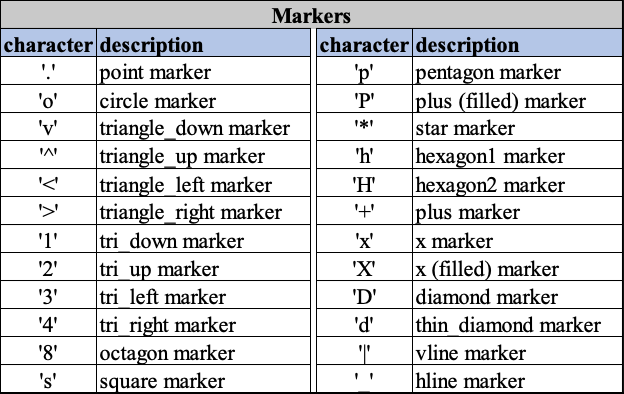 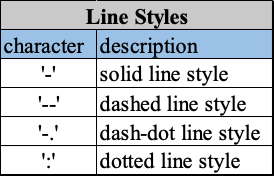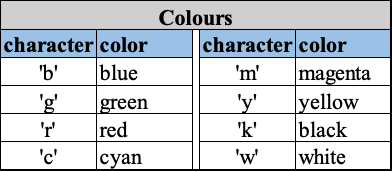

A list of color names in matplotlib can be found at [List of named colors — Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html). 

A list of markers in matplotlib is provided at [matplotlib.markers — Matplotlib](https://matplotlib.org/stable/api/markers_api.html).

Some examples:
* 'o-g' : a solid green line with circle markers
* 'o': no lines (a scatterplot) with circle markers
* '-g': a solid green line and no markers
* '--b': a dashed blue line and no markers
* 'D-.r': a dash-dot red line with diamond markers


### Adding text
We can also add text near a point in our plot, by the `plt.text(x_location,y_location,'text_to_add')` function. 

This is done by passing the coordinates of the point as well as the text to appear next to it to the text() function. Let's go back to add a text annotation for the event of the democratic party's VP pick, at the location of `x='2024-08-06', y=0.6`.


### Adding labels and legends

Sometimes we  need to add labels and legends (e.g., if we have more than one plot in the figure). 

To add labels to a plot we can add the argument label in the `plot()` function and add `plot.legend()` to add the label to a legend.


Legends are specifically useful if we include more than one plot in the same picture. In order to do that we should list all the plots before plt.show(). This will create all the plots in one picture.
* `plt.plot()`
* `plt.plot()`
* `plt.legend()`
* `plt.show()`

Let's go back to add the legends.